# Разработка рекомендательной системы для выбора книг на основе их жанров и аннотаций

In [1]:
!pip install kaggle

In [2]:
!kaggle datasets download -d ishikajohari/best-books-10k-multi-genre-data

Dataset URL: https://www.kaggle.com/datasets/ishikajohari/best-books-10k-multi-genre-data
License(s): CC0-1.0
  0% 0.00/4.63M [00:00<?, ?B/s]
100% 4.63M/4.63M [00:00<00:00, 149MB/s]


In [3]:
!unzip best-books-10k-multi-genre-data.zip

Archive:  best-books-10k-multi-genre-data.zip
  inflating: goodreads_data.csv      


In [4]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 5.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=127441f6e37c1f21ff300d1226ca02c2406cdca071a83d67dc451056444972a0
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [5]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from langdetect import detect
import string
import random

In [6]:
df = pd.read_csv('goodreads_data.csv')

In [7]:
df.head()

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,"5,691,311",https://www.goodreads.com/book/show/2657.To_Ki...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,"9,278,135",https://www.goodreads.com/book/show/72193.Harr...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,"3,944,155",https://www.goodreads.com/book/show/1885.Pride...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,"3,488,438",https://www.goodreads.com/book/show/48855.The_...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,"3,575,172",https://www.goodreads.com/book/show/170448.Ani...


# Data Preprocessing & EDA

In [8]:
df.isna().sum()

Unnamed: 0      0
Book            0
Author          0
Description    77
Genres          0
Avg_Rating      0
Num_Ratings     0
URL             0
dtype: int64

In [9]:
df = df.dropna()

In [10]:
df = df.loc[df['Genres'] != '[]']

In [11]:
def detect_lang(text):
    try:
        return detect(text)
    except:
        return 'unknown'

In [12]:
df['Lang'] = df['Description'].apply(detect_lang)

In [13]:
df_not_eng = df[df['Lang'] != 'en']

In [14]:
df_not_eng

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,Lang
247,247,زندگی مه آلود پریا,سید مرتضی مصطفوی,Mystical storyThe internal revolution of a wom...,['Fiction'],3.28,990,https://www.goodreads.com/book/show/40937505,fa
317,317,Beowulf,Unknown,Questo poema senza nome d'autore e senza titol...,"['Classics', 'Poetry', 'Fiction', 'Fantasy', '...",3.47,"288,583",https://www.goodreads.com/book/show/52357.Beowulf,it
472,472,صالة أورفانيللي,أشرف العشماوي,لكل قصة بداية وحكاية ونهاية ، وحياة كل إنسان ر...,"['Fiction', 'Novels', 'Politics', 'Drama', 'Eg...",4.15,"3,199",https://www.goodreads.com/book/show/56492991,ar
541,541,گم شده ای در مه,سید مرتضی مصطفوی,Philosophical story about human loneliness in ...,"['Fiction', 'Philosophy', 'Spirituality']",3.78,683,https://www.goodreads.com/book/show/40941582,fa
621,621,Contact,Carl Sagan,Jeune astronome convaincue de l'existence d'un...,"['Science Fiction', 'Fiction', 'Classics', 'Sc...",4.14,"137,283",https://www.goodreads.com/book/show/61666.Contact,fr
...,...,...,...,...,...,...,...,...,...
9902,9902,Petits Meurtres Entre Moines (Les Nouvelles En...,Frédéric Lenormand,A peine arrivé dans le monastère taoïste où l’...,"['Historical', 'Mystery']",3.73,30,https://www.goodreads.com/book/show/3166997-pe...,fr
9924,9924,Deșertul pentru totdeauna,Octavian Paler,Scris sub forma unui jurnal cu insemnari zilni...,"['Romanian Literature', 'Philosophy', 'Fiction']",4.29,551,https://www.goodreads.com/book/show/7105799-de...,ro
9925,9925,Dwanaście stacji,Tomasz Różycki,Dwanascie stacji,['Poetry'],4.08,65,https://www.goodreads.com/book/show/20555106-d...,pl
9962,9962,ZeroZeroZero,Roberto Saviano,"""Guarda la cocaina, vedrai polvere. Guarda att...","['Nonfiction', 'Crime', 'True Crime', 'Politic...",3.73,"5,070",https://www.goodreads.com/book/show/17729988-z...,it


In [15]:
df = df[df['Lang'] == 'en']

In [16]:
df.shape[0]

8738

In [17]:
df['Num_Ratings'] = df['Num_Ratings'].str.replace(',', '')
df['Num_Ratings'] = df['Num_Ratings'].astype(int)
df.head()

<ipython-input-17-cc7e27663a62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_Ratings'] = df['Num_Ratings'].str.replace(',', '')
<ipython-input-17-cc7e27663a62>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Num_Ratings'] = df['Num_Ratings'].astype(int)


,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,Lang
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,5691311,https://www.goodreads.com/book/show/2657.To_Ki...,en
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,9278135,https://www.goodreads.com/book/show/72193.Harr...,en
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,3944155,https://www.goodreads.com/book/show/1885.Pride...,en
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,3488438,https://www.goodreads.com/book/show/48855.The_...,en
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,3575172,https://www.goodreads.com/book/show/170448.Ani...,en


In [18]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [19]:
import spacy

In [20]:
nlp = spacy.load('en_core_web_sm')

In [21]:
def preprocess_text(text):
  text = ' '.join([token.lemma_.lower() for token in nlp(text)])
  text = ''.join([el for el in text if el not in string.punctuation])
  tokens = word_tokenize(text, language='english')
  stop_words = set(stopwords.words('english'))
  processed_tokens = [token for token in tokens if token not in stop_words and token.isalnum()]
  preprocessed_text = ' '.join(processed_tokens)

  return preprocessed_text

In [22]:
df['Preprocessed_Desc'] = df['Description'].map(preprocess_text)

In [23]:
unique_genres = df['Genres'].unique()
unique_genres_count = df['Genres'].nunique()
print(unique_genres)
print(unique_genres_count)

["['Classics', 'Fiction', 'Historical Fiction', 'School', 'Literature', 'Young Adult', 'Historical']"
 "['Fantasy', 'Fiction', 'Young Adult', 'Magic', 'Childrens', 'Middle Grade', 'Classics']"
 "['Classics', 'Fiction', 'Romance', 'Historical Fiction', 'Literature', 'Historical', 'Audiobook']"
 ...
 "['Dystopia', 'Science Fiction', 'Post Apocalyptic', 'Paranormal', 'Fantasy']"
 "['Fiction', 'Horror', 'Dystopia', 'Coming Of Age']"
 "['New Adult', 'Romance', 'Contemporary Romance', 'Contemporary']"]
7788


In [24]:
import collections

In [25]:
import ast
unique_genres = set()
genre_counts = collections.defaultdict(int)

for entry in df['Genres']:
    genres_list = ast.literal_eval(entry)
    unique_genres.update(genres_list)
    for genre in genres_list:
        genre_counts[genre] += 1

sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

print('Unique genres:', len(unique_genres))
print('Top 10 Genres:')
for position, (genre, count) in enumerate(sorted_genres[:50], start=1):
    print(f"{position}. {genre} - Frequency: {count}")

Unique genres: 610
Top 10 Genres:
1. Fiction - Frequency: 5493
2. Nonfiction - Frequency: 2275
3. Fantasy - Frequency: 2144
4. Classics - Frequency: 2025
5. Romance - Frequency: 1508
6. Young Adult - Frequency: 1498
7. Historical Fiction - Frequency: 1434
8. Mystery - Frequency: 1340
9. Contemporary - Frequency: 1256
10. Audiobook - Frequency: 1225
11. Novels - Frequency: 1070
12. Literature - Frequency: 1024
13. Thriller - Frequency: 1003
14. Historical - Frequency: 917
15. Science Fiction - Frequency: 825
16. History - Frequency: 791
17. Adventure - Frequency: 737
18. Philosophy - Frequency: 710
19. Biography - Frequency: 701
20. Self Help - Frequency: 699
21. Crime - Frequency: 691
22. Psychology - Frequency: 679
23. Adult - Frequency: 666
24. Mystery Thriller - Frequency: 663
25. Childrens - Frequency: 629
26. Memoir - Frequency: 600
27. Humor - Frequency: 555
28. Suspense - Frequency: 520
29. Horror - Frequency: 487
30. Paranormal - Frequency: 485
31. Science Fiction Fantasy - Fre

In [26]:
random_index = random.choice(df.index)

In [27]:
random_prepdesc = df.loc[random_index, 'Preprocessed_Desc']
description = df.loc[random_index, 'Description']

print(random_prepdesc)
print(description)

deng xiaoping effort open china take root late 1980 xinran recognize invaluable opportunity employee state radio system long want help improve life chinese woman give clearance host radio call show barely anticipate enthusiasm would quickly generate operate within constraint impose government censor word night breeze spark tremendous outpouring hour tape answering machine soon fill every night whether angry muted pose question simply relate experience anonymous woman bear witness decade civil strife halt attempt self understanding painfully restrictive society collection turn heartrende inspiring xinran bring story affect offer graphically detail altogether unprecedented work oral history
When Deng Xiaoping's efforts to "open up" China took root in the late 1980s, Xinran recognized an invaluable opportunity. As an employee for the state radio system, she had long wanted to help improve the lives of Chinese women. But when she was given clearance to host a radio call-in show, she barely

## TF-IDF

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
tfidf_v = TfidfVectorizer(max_df=0.95, min_df=2, max_features=1500)
tfidf_matrix = tfidf_v.fit_transform(df['Preprocessed_Desc'])

In [30]:
tfidf_matrix.shape

(8738, 1500)

In [31]:
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.08098089,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.15179322, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [32]:
tfidf_v.get_feature_names_out()

array(['abandon', 'ability', 'able', ..., 'york', 'young', 'youth'],
      dtype=object)

In [33]:
vocab_tf = tfidf_v.vocabulary_

In [34]:
vocab_tf

{'unforgettable': 1397,
 'novel': 901,
 'childhood': 211,
 'southern': 1220,
 'town': 1351,
 'crisis': 303,
 'rock': 1115,
 'kill': 728,
 'become': 116,
 'bestseller': 129,
 'critical': 305,
 'success': 1267,
 'first': 519,
 'publish': 1031,
 'go': 573,
 'win': 1463,
 'pulitzer': 1032,
 'prize': 1010,
 'later': 743,
 'make': 803,
 'academy': 4,
 'award': 99,
 'film': 512,
 'also': 48,
 'classic': 230,
 'dramatic': 390,
 'deeply': 338,
 'move': 860,
 'take': 1289,
 'reader': 1056,
 'root': 1121,
 'human': 646,
 'behavior': 120,
 'innocence': 683,
 'experience': 469,
 'love': 791,
 'humor': 648,
 'million': 840,
 'copy': 280,
 'print': 1006,
 'translate': 1362,
 'forty': 536,
 'language': 739,
 'story': 1249,
 'young': 1498,
 'woman': 1479,
 'claim': 228,
 'universal': 1400,
 'always': 52,
 'consider': 268,
 'book': 152,
 'simple': 1186,
 'today': 1340,
 'regard': 1075,
 'masterpiece': 815,
 'american': 57,
 'literature': 775,
 'harry': 608,
 'think': 1317,
 'ordinary': 916,
 'boy': 155,

## Bag-of-words

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
cv = CountVectorizer(max_df=0.95, min_df=2, max_features=1500)
bow_matrix = cv.fit_transform(df['Preprocessed_Desc'])

In [37]:
bow_matrix.shape

(8738, 1500)

In [38]:
bow_matrix.todense()

matrix([[0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [39]:
vocab_cv = cv.vocabulary_

In [40]:
vocab_cv

{'unforgettable': 1397,
 'novel': 901,
 'childhood': 211,
 'southern': 1220,
 'town': 1351,
 'crisis': 303,
 'rock': 1115,
 'kill': 728,
 'become': 116,
 'bestseller': 129,
 'critical': 305,
 'success': 1267,
 'first': 519,
 'publish': 1031,
 'go': 573,
 'win': 1463,
 'pulitzer': 1032,
 'prize': 1010,
 'later': 743,
 'make': 803,
 'academy': 4,
 'award': 99,
 'film': 512,
 'also': 48,
 'classic': 230,
 'dramatic': 390,
 'deeply': 338,
 'move': 860,
 'take': 1289,
 'reader': 1056,
 'root': 1121,
 'human': 646,
 'behavior': 120,
 'innocence': 683,
 'experience': 469,
 'love': 791,
 'humor': 648,
 'million': 840,
 'copy': 280,
 'print': 1006,
 'translate': 1362,
 'forty': 536,
 'language': 739,
 'story': 1249,
 'young': 1498,
 'woman': 1479,
 'claim': 228,
 'universal': 1400,
 'always': 52,
 'consider': 268,
 'book': 152,
 'simple': 1186,
 'today': 1340,
 'regard': 1075,
 'masterpiece': 815,
 'american': 57,
 'literature': 775,
 'harry': 608,
 'think': 1317,
 'ordinary': 916,
 'boy': 155,

## Word2Vec

In [41]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
model_w2v = Word2Vec(df['Preprocessed_Desc'], vector_size=50, window=10, min_count=2, workers=10)
w2v = model_w2v.train(df['Preprocessed_Desc'],total_examples=len(df['Preprocessed_Desc']),epochs=10)

## Doc2Vec

In [42]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
documents = [TaggedDocument(words=df['Preprocessed_Desc'], tags=['doc'])]
model_d2v = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4)
model_d2v.build_vocab(documents)
model_d2v.train(documents, total_examples=model_d2v.corpus_count, epochs=10)
inferred_vector = model_d2v.infer_vector(df['Preprocessed_Desc'])
vector_d2v = model_d2v.dv['doc']

## FasstText

In [43]:
from gensim.models import FastText
from gensim.test.utils import common_texts
model = FastText(vector_size=5, window=3, min_count=1)
model.build_vocab(df['Preprocessed_Desc'])
ft = model.train(df['Preprocessed_Desc'], total_examples=len(df['Preprocessed_Desc']), epochs=10)

# Кластеризация

In [44]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV

In [45]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
tfidf_df = pd.DataFrame(tfidf_matrix.todense())

In [49]:
new_columns = {g: df['Genres'].transform(lambda x: int(g in x)) for g in unique_genres}
genres_df = pd.DataFrame(new_columns)

In [ ]:
param_grid = {
    'n_clusters': np.arange(10, 200),
    'init': ['k-means++', 'random'],
    'max_iter': [100, 300, 500],
}

kmeans = KMeans()

random_search = RandomizedSearchCV(kmeans, param_grid, cv=5, n_iter = 10)
random_search.fit(tfidf_matrix)

best_params = random_search.best_params_
print(best_params)

{'n_clusters': 168, 'max_iter': 300, 'init': 'k-means++'}


In [47]:
from sklearn.metrics import silhouette_score

In [91]:
kmeans = KMeans(n_clusters=168, max_iter=300, init='k-means++')
silhouette_score(tfidf_df, kmeans.fit_predict(tfidf_matrix))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


-0.33423261635597923

In [ ]:
param_grid = {
    'n_clusters': np.arange(150, 300),
    'init': ['k-means++', 'random'],
    'max_iter': [100, 300, 500],
}

kmeans = KMeans()

random_search = RandomizedSearchCV(kmeans, param_grid, cv=5, n_iter = 10)
random_search.fit(tfidf_matrix)

best_params = random_search.best_params_
print(best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{'n_clusters': 237, 'max_iter': 500, 'init': 'k-means++'}


In [ ]:
kmeans = KMeans(n_clusters=237, max_iter=500, init='k-means++')
silhouette_score(tfidf_df, kmeans.fit_predict(tfidf_matrix))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


-0.506753521035524

In [ ]:
kmeans = KMeans(n_clusters=1000, max_iter=500, init='k-means++')
silhouette_score(tfidf_df, kmeans.fit_predict(tfidf_matrix))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


-0.9404428786674922

In [ ]:
from sklearn.decomposition import TruncatedSVD, PCA

In [ ]:
svd = TruncatedSVD(n_components=100)
data_reduced = svd.fit_transform(tfidf_matrix)

pca = PCA(n_components=2)
reduced_pca = pca.fit_transform(data_reduced)

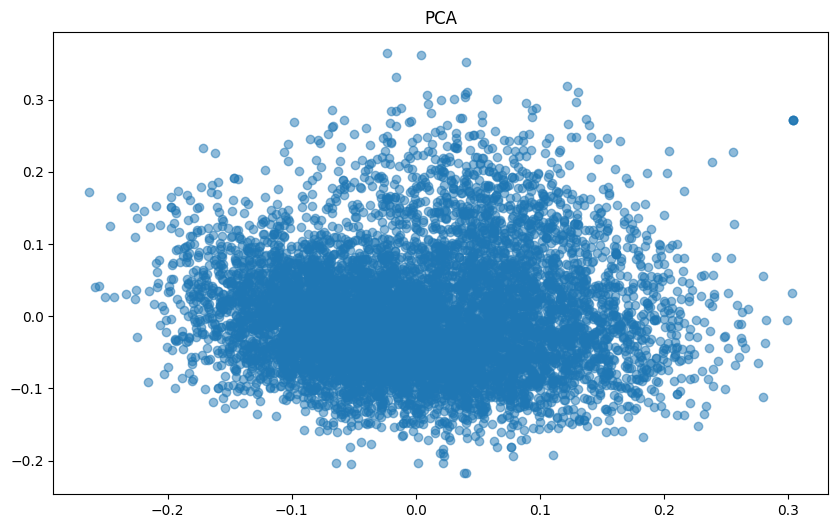

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(reduced_pca[:, 0], reduced_pca[:, 1], alpha=0.5)
plt.title('PCA')
plt.show()

In [ ]:
svd = TruncatedSVD(n_components=100)
data_reduced = svd.fit_transform(genres_df)

pca = PCA(n_components=2)
reduced_pca = pca.fit_transform(data_reduced)

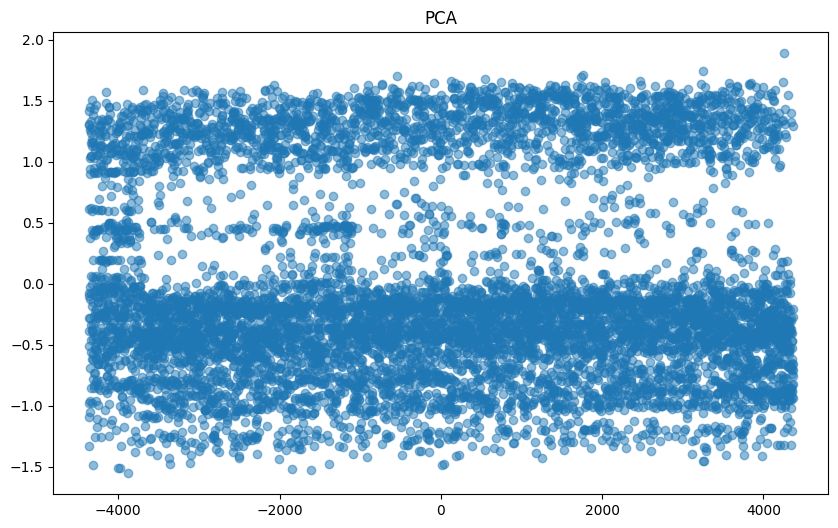

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(reduced_pca[:, 0], reduced_pca[:, 1], alpha=0.5)
plt.title('PCA')
plt.show()

In [ ]:
param_grid = {
    'n_clusters': np.arange(10, 500),
    'init': ['k-means++', 'random'],
    'max_iter': [100, 300, 500, 1000],
}

kmeans = KMeans()

random_search = RandomizedSearchCV(kmeans, param_grid, cv=5, n_iter = 10)
random_search.fit(genres_df)

best_params = random_search.best_params_
print(best_params)

In [ ]:
kmeans = KMeans(n_clusters=84, max_iter=500, init='k-means++')
silhouette_score(tfidf_df, kmeans.fit_predict(genres_df))

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(genres_df[:, 0], genres_df[:, 1], alpha=0.5)
plt.title('PCA')
plt.show()

In [ ]:
param_grid = {
    'n_clusters': np.arange(10, 500),
    'init': ['k-means++', 'random'],
    'max_iter': [100, 300, 500, 1000],
}

kmeans = KMeans()

random_search = RandomizedSearchCV(kmeans, param_grid, cv=5, n_iter = 10)
random_search.fit(reduced_pca)

best_params = random_search.best_params_
print(best_params)

In [ ]:
kmeans = KMeans(n_clusters=93, max_iter=1000, init='random')
silhouette_score(tfidf_df, kmeans.fit_predict(reduced_pca))

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

In [ ]:
WARD = linkage(reduced_pca, method="ward")

plt.figure(figsize=(12, 25))
dendrogram(WARD, color_threshold=0)
plt.show()

In [ ]:
plt.figure(figsize=(15, 15))
dendrogram(WARD, p=30, truncate_mode='lastp')
plt.show()

In [ ]:
final_kmeans = KMeans(n_clusters=83)

df2 = df.copy()
df2.loc[:, 'kmeans_cluster'] = final_kmeans.fit_predict(data_reduced)

In [ ]:
df2

In [ ]:
df2['kmeans_cluster'].value_counts()

In [ ]:
df2[df2['kmeans_cluster'] == 11].sample(20)

# Рекомендательная система по жанрам

In [ ]:
df

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,Lang,Preprocessed_Desc
0,0,To Kill a Mockingbird,Harper Lee,The unforgettable novel of a childhood in a sl...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.27,5691311,https://www.goodreads.com/book/show/2657.To_Ki...,en,unforgettable novel childhood sleepy southern ...
1,1,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,Harry Potter thinks he is an ordinary boy - un...,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",4.47,9278135,https://www.goodreads.com/book/show/72193.Harr...,en,harry potter think ordinary boy rescue owl tak...
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,3944155,https://www.goodreads.com/book/show/1885.Pride...,en,since immediate success 1813 pride prejudice r...
3,3,The Diary of a Young Girl,Anne Frank,Discovered in the attic in which she spent the...,"['Classics', 'Nonfiction', 'History', 'Biograp...",4.18,3488438,https://www.goodreads.com/book/show/48855.The_...,en,discover attic spend last year life anne frank...
4,4,Animal Farm,George Orwell,Librarian's note: There is an Alternate Cover ...,"['Classics', 'Fiction', 'Dystopia', 'Fantasy',...",3.98,3575172,https://www.goodreads.com/book/show/170448.Ani...,en,librarian note alternate cover edition edition...
...,...,...,...,...,...,...,...,...,...,...
9992,9992,Rise Up and Salute the Sun: The Writings of Su...,Suzy Kassem,"""Suzy Kassem is an American writer, poet, phil...","['Poetry', 'Philosophy', 'Spirituality']",4.18,180,https://www.goodreads.com/book/show/10097680-r...,en,suzy kassem american writer poet philosopher a...
9993,9993,Call To Crusade,Tom Vetter,"In Call To Crusade, Tom Vetter begins the Sieg...","['Historical Fiction', 'Historical']",4.56,39,https://www.goodreads.com/book/show/21521247-c...,en,call crusade tom vetter begin siege master ser...
9995,9995,"Breeders (Breeders Trilogy, #1)",Ashley Quigley,How far would you go? If human society was gen...,"['Dystopia', 'Science Fiction', 'Post Apocalyp...",3.44,276,https://www.goodreads.com/book/show/22085400-b...,en,far would go human society genuinely risk crue...
9997,9997,The Republic of Trees,Sam Taylor,This dark fable tells the story of four Englis...,"['Fiction', 'Horror', 'Dystopia', 'Coming Of A...",3.29,383,https://www.goodreads.com/book/show/891262.The...,en,dark fable tell story four english child run a...


In [50]:
genres_df

,Conspiracy Theories,Urban,Music,Young Adult,New York,Young Adult Contemporary,Archaeology,Abuse,Psychoanalysis,Werewolves,...,Dystopia,Boarding School,18th Century,Teaching,Scandinavian Literature,Genderfluid,Christian Non Fiction,The World,Physics,Vegan
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9995,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [51]:
from sklearn.metrics.pairwise import linear_kernel

In [60]:
def get_recommendations(book_title, matrix):
    cosine_sim = linear_kernel(matrix, matrix)
    idx = df[df['Book'] == book_title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Получаем 10 наиболее похожих книг
    book_indices = [i[0] for i in sim_scores]
    return df[['Book', 'Author', 'Genres']].iloc[book_indices]

# Пример использования
recommendations = get_recommendations(book_title="Animal Farm", matrix=genres_df)
print(recommendations)

                                                   Book              Author  \
9997                              The Republic of Trees          Sam Taylor   
9995                    Breeders (Breeders Trilogy, #1)      Ashley Quigley   
9993                                    Call To Crusade          Tom Vetter   
9992  Rise Up and Salute the Sun: The Writings of Su...         Suzy Kassem   
9991         The Evolution of Mara Dyer (Mara Dyer, #2)     Michelle Hodkin   
9987  Life at the Bottom: The Worldview That Makes t...  Theodore Dalrymple   
9985  Finding Me: A Decade of Darkness, A life Recla...     Michelle Knight   
9984                                       Rats Saw God          Rob Thomas   
9981                                      The Dark Lady       Dawn Chandler   
9980  Losing Dad, Paranoid Schizophrenia: A Family's...       Amanda LaPera   

                                                 Genres  
9997  ['Fiction', 'Horror', 'Dystopia', 'Coming Of A...  
9995  ['Dystop

### Avg_Rating + Num_Ratings + genres

In [61]:
genres_ratings_df = pd.concat([genres_df, df[['Avg_Rating', 'Num_Ratings']]], axis=1)

In [62]:
genres_ratings_df

,Conspiracy Theories,Urban,Music,Young Adult,New York,Young Adult Contemporary,Archaeology,Abuse,Psychoanalysis,Werewolves,...,Teaching,Scandinavian Literature,Genderfluid,Christian Non Fiction,The World,Physics,Vegan,N,Avg_Rating,Num_Ratings
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.27,5691311
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,4.47,9278135
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,4.28,3944155
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,4.18,3488438
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,3.98,3575172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8733,4.18,180
9993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8734,4.56,39
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8735,3.44,276
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8736,3.29,383


In [63]:
recommendations = get_recommendations(book_title="Animal Farm", matrix=genres_ratings_df)
print(recommendations)

                                         Book               Author  \
8608  The Hunger Games (The Hunger Games, #1)      Suzanne Collins   
4894  The Hunger Games (The Hunger Games, #1)      Suzanne Collins   
4868  The Hunger Games (The Hunger Games, #1)      Suzanne Collins   
21    The Hunger Games (The Hunger Games, #1)      Suzanne Collins   
77           Twilight (The Twilight Saga, #1)      Stephenie Meyer   
0                       To Kill a Mockingbird           Harper Lee   
7                            The Great Gatsby  F. Scott Fitzgerald   
106                    The Fault in Our Stars           John Green   
6                                        1984        George Orwell   
2                         Pride and Prejudice          Jane Austen   

                                                 Genres  
8608  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...  
4894  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...  
4868  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...

### Num_Ratings + genres

In [64]:
genres_numrat = pd.concat([genres_df, df['Num_Ratings']], axis=1)
genres_numrat

,Conspiracy Theories,Urban,Music,Young Adult,New York,Young Adult Contemporary,Archaeology,Abuse,Psychoanalysis,Werewolves,...,18th Century,Teaching,Scandinavian Literature,Genderfluid,Christian Non Fiction,The World,Physics,Vegan,N,Num_Ratings
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5691311
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,9278135
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,3944155
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,3488438
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,3575172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8733,180
9993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8734,39
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8735,276
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8736,383


In [65]:
recommendations = get_recommendations(book_title="Animal Farm", matrix=genres_numrat)
print(recommendations)

                                         Book               Author  \
8608  The Hunger Games (The Hunger Games, #1)      Suzanne Collins   
4894  The Hunger Games (The Hunger Games, #1)      Suzanne Collins   
4868  The Hunger Games (The Hunger Games, #1)      Suzanne Collins   
21    The Hunger Games (The Hunger Games, #1)      Suzanne Collins   
77           Twilight (The Twilight Saga, #1)      Stephenie Meyer   
0                       To Kill a Mockingbird           Harper Lee   
7                            The Great Gatsby  F. Scott Fitzgerald   
106                    The Fault in Our Stars           John Green   
6                                        1984        George Orwell   
2                         Pride and Prejudice          Jane Austen   

                                                 Genres  
8608  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...  
4894  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...  
4868  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...

### Avg_Rating + genres

In [66]:
genres_avgrat = pd.concat([genres_df, df['Avg_Rating']], axis=1)
genres_avgrat

,Conspiracy Theories,Urban,Music,Young Adult,New York,Young Adult Contemporary,Archaeology,Abuse,Psychoanalysis,Werewolves,...,18th Century,Teaching,Scandinavian Literature,Genderfluid,Christian Non Fiction,The World,Physics,Vegan,N,Avg_Rating
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4.27
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,4.47
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,4.28
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3,4.18
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4,3.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8733,4.18
9993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8734,4.56
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8735,3.44
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8736,3.29


In [67]:
recommendations = get_recommendations(book_title="Animal Farm", matrix=genres_avgrat)
print(recommendations)

                                                   Book              Author  \
9997                              The Republic of Trees          Sam Taylor   
9995                    Breeders (Breeders Trilogy, #1)      Ashley Quigley   
9993                                    Call To Crusade          Tom Vetter   
9992  Rise Up and Salute the Sun: The Writings of Su...         Suzy Kassem   
9991         The Evolution of Mara Dyer (Mara Dyer, #2)     Michelle Hodkin   
9987  Life at the Bottom: The Worldview That Makes t...  Theodore Dalrymple   
9985  Finding Me: A Decade of Darkness, A life Recla...     Michelle Knight   
9984                                       Rats Saw God          Rob Thomas   
9981                                      The Dark Lady       Dawn Chandler   
9980  Losing Dad, Paranoid Schizophrenia: A Family's...       Amanda LaPera   

                                                 Genres  
9997  ['Fiction', 'Horror', 'Dystopia', 'Coming Of A...  
9995  ['Dystop

# Теперь посмотрим на тексты

In [68]:
recommendations = get_recommendations(book_title="Animal Farm", matrix=tfidf_matrix)
print(recommendations)

                                                   Book               Author  \
4086  Farm Sanctuary: Changing Hearts and Minds Abou...            Gene Baur   
137                                  Animal Farm / 1984        George Orwell   
1045                 Kerri's War (The King Trilogy, #3)     Stephen Douglass   
1310                                    Just So Stories      Rudyard Kipling   
4589  Animals in Translation: Using the Mysteries of...       Temple Grandin   
2172                                  The Speed of Life  James Victor Jordan   
3116                  The Last Wish (The Witcher, #0.5)    Andrzej Sapkowski   
7805                                   Arms and the Man  George Bernard Shaw   
8491  Animals Matter: A Biologist Explains Why We Sh...          Marc Bekoff   
1170                                  Animal Liberation         Peter Singer   

                                                 Genres  
4086  ['Nonfiction', 'Animals', 'Vegan', 'Food', 'Ac...  
137

In [69]:
recommendations = get_recommendations(book_title="Animal Farm", matrix=bow_matrix)
print(recommendations)

                                                   Book                Author  \
4086  Farm Sanctuary: Changing Hearts and Minds Abou...             Gene Baur   
7974                     The Tale of Jemima Puddle-Duck        Beatrix Potter   
4589  Animals in Translation: Using the Mysteries of...        Temple Grandin   
5967                            Economics in One Lesson         Henry Hazlitt   
8219                                         God Speaks            Meher Baba   
9360  A Dog Named Leaf: The Hero from Heaven Who Sav...        Allen Anderson   
87     The Little House Collection (Little House, #1-9)  Laura Ingalls Wilder   
1517                         Emotional Intelligence 2.0      Travis Bradberry   
5690  Self Matters: Creating Your Life from the Insi...     Phillip C. McGraw   
2855                     The Art of Startup Fundraising    Alejandro Cremades   

                                                 Genres  
4086  ['Nonfiction', 'Animals', 'Vegan', 'Food', '

# match annotations and genres

### tfidf + genres

In [52]:
genres_df['N'] = [i for i in range(8738)]
genres_df

,Conspiracy Theories,Urban,Music,Young Adult,New York,Young Adult Contemporary,Archaeology,Abuse,Psychoanalysis,Werewolves,...,Boarding School,18th Century,Teaching,Scandinavian Literature,Genderfluid,Christian Non Fiction,The World,Physics,Vegan,N
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8733
9993,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8734
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8735
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8736


In [53]:
tfidf_df = pd.DataFrame(tfidf_matrix.todense())

In [55]:
tfidf_df['N'] = [i for i in range(8738)]

In [56]:
genres_tfidf_df = pd.merge(genres_df, tfidf_df, left_on='N', right_on='N')

In [57]:
del genres_tfidf_df['N']

In [58]:
genres_tfidf_df

,Conspiracy Theories,Urban,Music,Young Adult,New York,Young Adult Contemporary,Archaeology,Abuse,Psychoanalysis,Werewolves,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.080981,0.0
1,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.176064,0.0,0.0,0.072946,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8733,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.249782,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
8734,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.079728,0.0,0.0,0.000000,0.0
8735,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
8736,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


In [70]:
recommendations = get_recommendations(book_title="Animal Farm", matrix=genres_tfidf_df)
print(recommendations)

                                             Book                   Author  \
137                            Animal Farm / 1984            George Orwell   
607                                        Utopia              Thomas More   
282                                    The Jungle           Upton Sinclair   
6                                            1984            George Orwell   
24                                 Fahrenheit 451             Ray Bradbury   
79                              The Metamorphosis              Franz Kafka   
2072              The Rime of the Ancient Mariner  Samuel Taylor Coleridge   
109                               Brave New World            Aldous Huxley   
41    Brave New World / Brave New World Revisited            Aldous Huxley   
1415                                      Grendel             John Gardner   

                                                 Genres  
137   ['Classics', 'Fiction', 'Dystopia', 'Literatur...  
607   ['Classics', 'Philo

### bag of words + genres

In [71]:
bow_df = pd.DataFrame(bow_matrix.todense())
bow_df['N'] = [i for i in range(8738)]
genres_bow_df = pd.merge(genres_df, bow_df, left_on='N', right_on='N')

In [72]:
del genres_bow_df['N']

In [73]:
genres_bow_df

,Conspiracy Theories,Urban,Music,Young Adult,New York,Young Adult Contemporary,Archaeology,Abuse,Psychoanalysis,Werewolves,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8733,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8734,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,0,0,0,0
8735,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
recommendations = get_recommendations(book_title="Animal Farm", matrix=genres_bow_df)
print(recommendations)

                                                   Book                Author  \
7974                     The Tale of Jemima Puddle-Duck        Beatrix Potter   
4086  Farm Sanctuary: Changing Hearts and Minds Abou...             Gene Baur   
4589  Animals in Translation: Using the Mysteries of...        Temple Grandin   
5967                            Economics in One Lesson         Henry Hazlitt   
137                                  Animal Farm / 1984         George Orwell   
8219                                         God Speaks            Meher Baba   
9360  A Dog Named Leaf: The Hero from Heaven Who Sav...        Allen Anderson   
87     The Little House Collection (Little House, #1-9)  Laura Ingalls Wilder   
1517                         Emotional Intelligence 2.0      Travis Bradberry   
5690  Self Matters: Creating Your Life from the Insi...     Phillip C. McGraw   

                                                 Genres  
7974  ['Childrens', 'Picture Books', 'Classics', '

# Checking on another book

In [75]:
title = 'Pride and Prejudice'

In [76]:
recommendations = get_recommendations(book_title=title, matrix=genres_df)
print(recommendations)

                                                   Book  \
9997                              The Republic of Trees   
9993                                    Call To Crusade   
9995                    Breeders (Breeders Trilogy, #1)   
9991         The Evolution of Mara Dyer (Mara Dyer, #2)   
9992  Rise Up and Salute the Sun: The Writings of Su...   
9987  Life at the Bottom: The Worldview That Makes t...   
9984                                       Rats Saw God   
9985  Finding Me: A Decade of Darkness, A life Recla...   
9981                                      The Dark Lady   
9978                                   Understood Betsy   

                       Author  \
9997               Sam Taylor   
9993               Tom Vetter   
9995           Ashley Quigley   
9991          Michelle Hodkin   
9992              Suzy Kassem   
9987       Theodore Dalrymple   
9984               Rob Thomas   
9985          Michelle Knight   
9981            Dawn Chandler   
9978  Dorothy Canfie

In [77]:
recommendations = get_recommendations(book_title=title, matrix=genres_ratings_df)
print(recommendations)

                                         Book               Author  \
8608  The Hunger Games (The Hunger Games, #1)      Suzanne Collins   
4894  The Hunger Games (The Hunger Games, #1)      Suzanne Collins   
4868  The Hunger Games (The Hunger Games, #1)      Suzanne Collins   
21    The Hunger Games (The Hunger Games, #1)      Suzanne Collins   
77           Twilight (The Twilight Saga, #1)      Stephenie Meyer   
0                       To Kill a Mockingbird           Harper Lee   
7                            The Great Gatsby  F. Scott Fitzgerald   
106                    The Fault in Our Stars           John Green   
6                                        1984        George Orwell   
2                         Pride and Prejudice          Jane Austen   

                                                 Genres  
8608  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...  
4894  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...  
4868  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...

In [78]:
recommendations = get_recommendations(book_title=title, matrix=genres_numrat)
print(recommendations)

                                         Book               Author  \
8608  The Hunger Games (The Hunger Games, #1)      Suzanne Collins   
4894  The Hunger Games (The Hunger Games, #1)      Suzanne Collins   
4868  The Hunger Games (The Hunger Games, #1)      Suzanne Collins   
21    The Hunger Games (The Hunger Games, #1)      Suzanne Collins   
77           Twilight (The Twilight Saga, #1)      Stephenie Meyer   
0                       To Kill a Mockingbird           Harper Lee   
7                            The Great Gatsby  F. Scott Fitzgerald   
106                    The Fault in Our Stars           John Green   
6                                        1984        George Orwell   
2                         Pride and Prejudice          Jane Austen   

                                                 Genres  
8608  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...  
4894  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...  
4868  ['Young Adult', 'Fiction', 'Dystopia', 'Fantas...

In [79]:
recommendations = get_recommendations(book_title=title, matrix=genres_avgrat)
print(recommendations)

                                                   Book  \
9993                                    Call To Crusade   
9997                              The Republic of Trees   
9995                    Breeders (Breeders Trilogy, #1)   
9991         The Evolution of Mara Dyer (Mara Dyer, #2)   
9992  Rise Up and Salute the Sun: The Writings of Su...   
9987  Life at the Bottom: The Worldview That Makes t...   
9985  Finding Me: A Decade of Darkness, A life Recla...   
9984                                       Rats Saw God   
9981                                      The Dark Lady   
9978                                   Understood Betsy   

                       Author  \
9993               Tom Vetter   
9997               Sam Taylor   
9995           Ashley Quigley   
9991          Michelle Hodkin   
9992              Suzy Kassem   
9987       Theodore Dalrymple   
9985          Michelle Knight   
9984               Rob Thomas   
9981            Dawn Chandler   
9978  Dorothy Canfie

In [80]:
recommendations = get_recommendations(book_title=title, matrix=tfidf_matrix)
print(recommendations)

                                                   Book              Author  \
3536  Pride and Prejudice and Zombies (Pride and Pre...  Seth Grahame-Smith   
8390                                   Innocent Traitor         Alison Weir   
7158                            The Life of Elizabeth I         Alison Weir   
5522  Dawn of the Dreadfuls (Pride and Prejudice and...   Steve Hockensmith   
5239                        Austenland (Austenland, #1)        Shannon Hale   
8741  Nice Girls Don't Date Dead Men (Jane Jameson, #2)        Molly Harper   
5022  The Naughtiest Girl in the School (The Naughti...         Enid Blyton   
11                                            Jane Eyre    Charlotte Brontë   
7642  The Last Tudor (The Plantagenet and Tudor Nove...    Philippa Gregory   
1696                                The Complete Novels         Jane Austen   

                                                 Genres  
3536  ['Fiction', 'Horror', 'Fantasy', 'Zombies', 'H...  
8390  ['Histor

In [81]:
recommendations = get_recommendations(book_title=title, matrix=bow_matrix)
print(recommendations)

                                                   Book  \
5967                            Economics in One Lesson   
8390                                   Innocent Traitor   
9430                The Squirrel that Dreamt of Madness   
8986  Make It Happen, A Healthy, Competitive Approac...   
1517                         Emotional Intelligence 2.0   
4197                          Nobody Asked Me, But ....   
6580                                       Sahih Muslim   
7642  The Last Tudor (The Plantagenet and Tudor Nove...   
8762                                      The Blind Owl   
5109                  A Man Named Dave (Dave Pelzer #3)   

                       Author  \
5967            Henry Hazlitt   
8390              Alison Weir   
9430             Craig  Stone   
8986              Lorii Myers   
1517         Travis Bradberry   
4197             Karl Wiggins   
6580  Imam Abul-Husain Muslim   
7642         Philippa Gregory   
8762           Sadegh Hedayat   
5109              Da

In [82]:
recommendations = get_recommendations(book_title=title, matrix=genres_tfidf_df)
print(recommendations)

                           Book               Author  \
150                  Persuasion          Jane Austen   
110       Sense and Sensibility          Jane Austen   
190                        Emma          Jane Austen   
3581        The Enchanted April  Elizabeth von Arnim   
11                    Jane Eyre     Charlotte Brontë   
1696        The Complete Novels          Jane Austen   
1681        Wives and Daughters    Elizabeth Gaskell   
20                 Little Women    Louisa May Alcott   
271   Tess of the D'Urbervilles         Thomas Hardy   
397              Mansfield Park          Jane Austen   

                                                 Genres  
150   ['Classics', 'Fiction', 'Romance', 'Historical...  
110   ['Classics', 'Fiction', 'Romance', 'Historical...  
190   ['Classics', 'Fiction', 'Romance', 'Historical...  
3581  ['Classics', 'Fiction', 'Italy', 'Historical F...  
11    ['Classics', 'Fiction', 'Romance', 'Historical...  
1696  ['Classics', 'Fiction', 'Roma

In [83]:
recommendations = get_recommendations(book_title=title, matrix=genres_bow_df)
print(recommendations)

                                                   Book  \
8390                                   Innocent Traitor   
5967                            Economics in One Lesson   
9430                The Squirrel that Dreamt of Madness   
8986  Make It Happen, A Healthy, Competitive Approac...   
7642  The Last Tudor (The Plantagenet and Tudor Nove...   
27                                    Wuthering Heights   
1517                         Emotional Intelligence 2.0   
8762                                      The Blind Owl   
4197                          Nobody Asked Me, But ....   
6580                                       Sahih Muslim   

                       Author  \
8390              Alison Weir   
5967            Henry Hazlitt   
9430             Craig  Stone   
8986              Lorii Myers   
7642         Philippa Gregory   
27               Emily Brontë   
1517         Travis Bradberry   
8762           Sadegh Hedayat   
4197             Karl Wiggins   
6580  Imam Abul-Husa

# Romance

In [84]:
fiction_df = df[df['Genres'].apply(lambda x: 'Nonfiction' not in x)]

In [85]:
fiction_df.shape[0]

6463

In [86]:
unique_genres = set()
genre_counts = collections.defaultdict(int)

for entry in fiction_df['Genres']:
    genres_list = ast.literal_eval(entry)
    unique_genres.update(genres_list)
    for genre in genres_list:
        genre_counts[genre] += 1

sorted_genres = sorted(genre_counts.items(), key=lambda x: x[1], reverse=True)

print('Unique genres:', len(unique_genres))
print('Top 10 Genres:')
for position, (genre, count) in enumerate(sorted_genres[:50], start=1):
    print(f"{position}. {genre} - Frequency: {count}")

Unique genres: 473
Top 10 Genres:
1. Fiction - Frequency: 5493
2. Fantasy - Frequency: 2144
3. Classics - Frequency: 1749
4. Young Adult - Frequency: 1498
5. Romance - Frequency: 1493
6. Historical Fiction - Frequency: 1434
7. Mystery - Frequency: 1315
8. Contemporary - Frequency: 1223
9. Novels - Frequency: 1070
10. Thriller - Frequency: 993
11. Literature - Frequency: 983
12. Science Fiction - Frequency: 825
13. Audiobook - Frequency: 823
14. Historical - Frequency: 789
15. Adventure - Frequency: 688
16. Mystery Thriller - Frequency: 663
17. Crime - Frequency: 633
18. Childrens - Frequency: 607
19. Adult - Frequency: 606
20. Suspense - Frequency: 520
21. Horror - Frequency: 484
22. Paranormal - Frequency: 478
23. Science Fiction Fantasy - Frequency: 428
24. Middle Grade - Frequency: 407
25. Humor - Frequency: 407
26. Literary Fiction - Frequency: 396
27. Drama - Frequency: 358
28. Magic - Frequency: 325
29. Dystopia - Frequency: 317
30. Short Stories - Frequency: 314
31. American - F

In [87]:
print(fiction_df['Genres'])

0       ['Classics', 'Fiction', 'Historical Fiction', ...
1       ['Fantasy', 'Fiction', 'Young Adult', 'Magic',...
2       ['Classics', 'Fiction', 'Romance', 'Historical...
4       ['Classics', 'Fiction', 'Dystopia', 'Fantasy',...
5       ['Classics', 'Fiction', 'Fantasy', 'Childrens'...
                              ...                        
9992             ['Poetry', 'Philosophy', 'Spirituality']
9993                 ['Historical Fiction', 'Historical']
9995    ['Dystopia', 'Science Fiction', 'Post Apocalyp...
9997    ['Fiction', 'Horror', 'Dystopia', 'Coming Of A...
9998    ['New Adult', 'Romance', 'Contemporary Romance...
Name: Genres, Length: 6463, dtype: object


In [88]:
romance_genres = []
for genre in unique_genres:
  if 'romance' in genre.lower():
    romance_genres.append(genre)

In [89]:
romance_genres

['Clean Romance',
 'Paranormal Romance',
 'Military Romance',
 'Science Fiction Romance',
 'Regency Romance',
 'Sports Romance',
 'Christian Romance',
 'Young Adult Romance',
 'Contemporary Romance',
 'Historical Romance',
 'Romance',
 'Fantasy Romance',
 'M M Romance',
 'New Adult Romance',
 'M F Romance',
 'Medieval Romance',
 'Lesbian Romance',
 'Erotic Romance']

In [90]:
romance_df = fiction_df[fiction_df['Genres'].apply(lambda x: any(genre in x for genre in romance_genres))]
romance_df

,Unnamed: 0,Book,Author,Description,Genres,Avg_Rating,Num_Ratings,URL,Lang,Preprocessed_Desc
2,2,Pride and Prejudice,Jane Austen,"Since its immediate success in 1813, Pride and...","['Classics', 'Fiction', 'Romance', 'Historical...",4.28,3944155,https://www.goodreads.com/book/show/1885.Pride...,en,since immediate success 1813 pride prejudice r...
7,7,The Great Gatsby,F. Scott Fitzgerald,Alternate Cover Edition ISBN: 0743273567 (ISBN...,"['Classics', 'Fiction', 'School', 'Historical ...",3.93,4839642,https://www.goodreads.com/book/show/4671.The_G...,en,alternate cover edition isbn 0743273567 isbn13...
11,11,Jane Eyre,Charlotte Brontë,"Orphaned as a child, Jane has felt an outcast ...","['Classics', 'Fiction', 'Romance', 'Historical...",4.14,1975582,https://www.goodreads.com/book/show/10210.Jane...,en,orphan child jane feel outcast whole young lif...
14,14,Romeo and Juliet,William Shakespeare,"In Romeo and Juliet, Shakespeare creates a vio...","['Classics', 'Plays', 'Fiction', 'Romance', 'S...",3.74,2469086,https://www.goodreads.com/book/show/18135.Rome...,en,romeo juliet shakespeare create violent world ...
20,20,Little Women,Louisa May Alcott,This is an alternate cover edition of ISBN 978...,"['Classics', 'Fiction', 'Historical Fiction', ...",4.14,2085559,https://www.goodreads.com/book/show/1934.Littl...,en,alternate cover edition isbn 9780451529305gene...
...,...,...,...,...,...,...,...,...,...,...
9961,9961,Play Dirty,Sandra Brown,#1 New York Times bestselling author Sandra B...,"['Romance', 'Romantic Suspense', 'Mystery', 'S...",4.03,17591,https://www.goodreads.com/book/show/30403.Play...,en,1 new york times bestselle author sandra brown...
9981,9981,The Dark Lady,Dawn Chandler,She should have grown up in a life of luxury a...,"['Historical', 'Romance', 'Historical Romance'...",3.95,79,https://www.goodreads.com/book/show/17995352-t...,en,grow life luxury ease instead thrust one dange...
9984,9984,Rats Saw God,Rob Thomas,"For Steve York, life was good. He had a 4.0 GP...","['Young Adult', 'Fiction', 'Teen', 'Realistic ...",3.79,3456,https://www.goodreads.com/book/show/207889.Rat...,en,steve york life good 40 gpa friend could trust...
9991,9991,"The Evolution of Mara Dyer (Mara Dyer, #2)",Michelle Hodkin,Mara Dyer knows she isn't crazy. She knows tha...,"['Young Adult', 'Paranormal', 'Fantasy', 'Roma...",4.26,94298,https://www.goodreads.com/book/show/13643567-t...,en,mara dyer know crazy know kill mind noah heal ...
